<a href="https://colab.research.google.com/github/PatandyaW/TESTINGIDXDS/blob/main/IDX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/IDX/loan_data_2007_2014.csv')
df.sample(5)

<ipython-input-11-b6d48ff36372>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/IDX/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
384139,384139,16852660,18975194,25000,25000,25000.0,60 months,14.49,588.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,36800.0,NaN,NaN,NaN
8167,8167,869878,1083777,8000,8000,8000.0,36 months,5.99,243.34,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425521,425521,12936214,14968413,8025,8025,8025.0,36 months,19.99,298.20,E,...,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,NaN,NaN,NaN
100694,100694,6844590,8466741,5175,5175,5175.0,36 months,11.55,170.78,B,...,NaN,NaN,NaN,NaN,NaN,NaN,50600.0,NaN,NaN,NaN
456243,456243,10684785,12576929,30000,30000,30000.0,60 months,17.57,754.81,D,...,NaN,NaN,NaN,NaN,NaN,NaN,35200.0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
...,...
all_util,466285
total_rev_hi_lim,70276
inq_fi,466285
total_cu_tl,466285


In [ ]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

emp_title null rate: 5.92%
emp_length null rate: 4.51%
annual_inc null rate: 0.0%
desc null rate: 72.98%
title null rate: 0.0%
delinq_2yrs null rate: 0.01%
earliest_cr_line null rate: 0.01%
inq_last_6mths null rate: 0.01%
mths_since_last_delinq null rate: 53.69%
mths_since_last_record null rate: 86.57%
open_acc null rate: 0.01%
pub_rec null rate: 0.01%
revol_util null rate: 0.07%
total_acc null rate: 0.01%
last_pymnt_d null rate: 0.08%
next_pymnt_d null rate: 48.73%
last_credit_pull_d null rate: 0.01%
collections_12_mths_ex_med null rate: 0.03%
mths_since_last_major_derog null rate: 78.77%
annual_inc_joint null rate: 100.0%
dti_joint null rate: 100.0%
verification_status_joint null rate: 100.0%
acc_now_delinq null rate: 0.01%
tot_coll_amt null rate: 15.07%
tot_cur_bal null rate: 15.07%
open_acc_6m null rate: 100.0%
open_il_6m null rate: 100.0%
open_il_12m null rate: 100.0%
open_il_24m null rate: 100.0%
mths_since_rcnt_il null rate: 100.0%
total_bal_il null rate: 100.0%
il_util null rat

In [ ]:
df.describe(include="all")

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,NaN,10.990000,256.690000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,NaN,13.660000,379.890000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,NaN,16.490000,566.580000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN


In [ ]:
# Defining columns will be dropped
cols_to_drop = [
    # unique id
    'Unnamed: 0',
    'id',
    'member_id',

    # free text
    'url',
    'desc',

    # all null / constant / other
    'zip_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'mths_since_last_major_derog',
    'tot_coll_amt',
    'tot_cur_bal',
    'total_rev_hi_lim',

    # expert judgment
    'sub_grade'
]



# df_cleaned = df.drop(columns=cols_to_drop)

# Hapus kolom dari DataFrame
df.drop(cols_to_drop, axis=1, inplace=True)

# Cek hasilnya
print(df.info())

# Cek ukuran DataFrame setelah penghapusan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status   

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
loan_stat = df.loan_status.value_counts(normalize=True) * 100
print(loan_stat)

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64


In [ ]:
bad_payment_statuses = [
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Charged Off",
    "Late (16-30 days)",
    "Late (31-120 days)"
]

# Calculate the total percentage of bad payments
bad_payment_percentage = loan_stat[bad_payment_statuses].sum()

print(f"Percentage of bad payments: {bad_payment_percentage:.2f}%")

Percentage of bad payments: 11.19%


In [ ]:
# Mapping kategori menjadi numerik (1 = Good, 0 = Bad Payment)
df['payment_category'] = np.where(df['loan_status'].isin(bad_payment_statuses), 1 , 0)

# Hitung persentase untuk setiap kategori numerik
payment_category_stat = df['payment_category'].value_counts(normalize=True) * 100

print(payment_category_stat)


payment_category
0    88.808132
1    11.191868
Name: proportion, dtype: float64


In [ ]:
# //////////////////

In [ ]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
def clean_emp_length(value):
    if isinstance(value, str):  # Pastikan nilainya string sebelum diproses
        if "10+" in value:
            return 10.0
        elif "< 1" in value:
            return 0.5  # Bisa diatur ke 0 atau 0.5 sesuai kebutuhan
        else:
            return float(value.split()[0])  # Ambil angka di awal string
    return np.nan  # Jika NaN, biarkan tetap NaN

# Terapkan fungsi ke kolom
df['emp_length'] = df['emp_length'].apply(clean_emp_length)

# Cek hasilnya
print(df['emp_length'].unique())

[10.   0.5  1.   3.   8.   9.   4.   5.   6.   2.   7.   nan]


In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
# Hapus teks " months" dan ubah ke float
df['term'] = df['term'].str.strip().str.replace(" months", "").astype(float)

# Cek hasilnya
print(df['term'].unique())

[36. 60.]


In [ ]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'],format='%b-%y')
print(df['earliest_cr_line_date'].head())

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]


In [ ]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line_date'])

# Tentukan tanggal referensi
reference_date = pd.to_datetime('2017-12-01')

# Hitung jumlah bulan secara akurat
df['months_since_earliest_cr_line'] = (reference_date.year - df['earliest_cr_line_date'].dt.year) * 12 + \
                                      (reference_date.month - df['earliest_cr_line_date'].dt.month)

# Cek hasilnya
print(df['months_since_earliest_cr_line'])

0         395.0
1         224.0
2         193.0
3         262.0
4         263.0
          ...  
466280    176.0
466281    246.0
466282    192.0
466283    178.0
466284    214.0
Name: months_since_earliest_cr_line, Length: 466285, dtype: float64


In [ ]:
print(df['months_since_earliest_cr_line'].describe())

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64


In [ ]:
print(df[df['months_since_earliest_cr_line']< 0][['earliest_cr_line','earliest_cr_line_date','months_since_earliest_cr_line']].head)

<bound method NDFrame.head of        earliest_cr_line earliest_cr_line_date  months_since_earliest_cr_line
1580             Sep-62            2062-09-01                         -537.0
1770             Sep-68            2068-09-01                         -609.0
2799             Sep-64            2064-09-01                         -561.0
3282             Sep-67            2067-09-01                         -597.0
3359             Feb-65            2065-02-01                         -566.0
...                 ...                   ...                            ...
464003           Jan-68            2068-01-01                         -601.0
464260           Jul-66            2066-07-01                         -583.0
465100           Oct-67            2067-10-01                         -598.0
465500           Sep-67            2067-09-01                         -597.0
465655           Jan-56            2056-01-01                         -457.0

[1169 rows x 3 columns]>


In [ ]:
df.loc[df['months_since_earliest_cr_line'] < 0, 'months_since_earliest_cr_line'] = df['months_since_earliest_cr_line'].max()

In [ ]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'],format='%b-%y')
print(df['issue_d_date'].head())

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d_date, dtype: datetime64[ns]


In [ ]:
# Pastikan kolom issue_d_date dalam format datetime
df['issue_d_date'] = pd.to_datetime(df['issue_d_date'])

# Tentukan tanggal referensi
reference_date = pd.to_datetime('2017-12-01')

# Hitung jumlah bulan antara reference_date dan issue_d_date
df['months_since_issue'] = (reference_date.year - df['issue_d_date'].dt.year) * 12 + \
                           (reference_date.month - df['issue_d_date'].dt.month)

# Cek hasilnya
print(df['months_since_issue'])


0         72
1         72
2         72
3         72
4         72
          ..
466280    47
466281    47
466282    47
466283    47
466284    47
Name: months_since_issue, Length: 466285, dtype: int32


In [ ]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')
print(df['last_pymnt_d_date'].head())

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-01-01
Name: last_pymnt_d_date, dtype: datetime64[ns]


In [ ]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d_date'])
reference_date = pd.to_datetime('2017-12-01')
df['months_since_last_pymnt'] = (reference_date.year - df['last_pymnt_d_date'].dt.year)* 12 + \
                                (reference_date.month - df['last_pymnt_d_date'].dt.month)

In [ ]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'],format='%b-%y')
print(df['next_pymnt_d_date'].head())

0          NaT
1          NaT
2          NaT
3          NaT
4   2016-02-01
Name: next_pymnt_d_date, dtype: datetime64[ns]


In [ ]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d_date'])
reference_date = pd.to_datetime('2017-12-01')
df['months_since_next_pymnt'] = (reference_date.year - df['next_pymnt_d_date'].dt.year)* 12 + \
                                (reference_date.month - df['next_pymnt_d_date'].dt.month)

In [ ]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
print(df['last_credit_pull_d_date'].head())

0   2016-01-01
1   2013-09-01
2   2016-01-01
3   2015-01-01
4   2016-01-01
Name: last_credit_pull_d_date, dtype: datetime64[ns]


In [ ]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d_date'])
reference_date = pd.to_datetime('2017-12-01')
df['months_since_last_credit_pull'] = (reference_date.year - df['last_credit_pull_d_date'].dt.year)* 12 + \
                                      (reference_date.month - df['last_credit_pull_d_date'].dt.month)

In [ ]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_since_issue,last_pymnt_d_date,months_since_last_pymnt,next_pymnt_d_date,months_since_next_pymnt,last_credit_pull_d_date,months_since_last_credit_pull
0,5000,5000,4975.0,36.0,10.65,162.87,B,NaN,10.0,RENT,...,1985-01-01,395.0,2011-12-01,72,2015-01-01,35.0,NaT,NaN,2016-01-01,23.0
1,2500,2500,2500.0,60.0,15.27,59.83,C,Ryder,0.5,RENT,...,1999-04-01,224.0,2011-12-01,72,2013-04-01,56.0,NaT,NaN,2013-09-01,51.0
2,2400,2400,2400.0,36.0,15.96,84.33,C,NaN,10.0,RENT,...,2001-11-01,193.0,2011-12-01,72,2014-06-01,42.0,NaT,NaN,2016-01-01,23.0
3,10000,10000,10000.0,36.0,13.49,339.31,C,AIR RESOURCES BOARD,10.0,RENT,...,1996-02-01,262.0,2011-12-01,72,2015-01-01,35.0,NaT,NaN,2015-01-01,35.0
4,3000,3000,3000.0,60.0,12.69,67.79,B,University Medical Group,1.0,RENT,...,1996-01-01,263.0,2011-12-01,72,2016-01-01,23.0,2016-02-01,22.0,2016-01-01,23.0


In [ ]:
print(df.dtypes)


loan_amnt                                 int64
funded_amnt                               int64
funded_amnt_inv                         float64
term                                    float64
int_rate                                float64
installment                             float64
grade                                    object
emp_title                                object
emp_length                              float64
home_ownership                           object
annual_inc                              float64
verification_status                      object
issue_d                                  object
loan_status                              object
pymnt_plan                               object
purpose                                  object
title                                    object
addr_state                               object
dti                                     float64
delinq_2yrs                             float64
earliest_cr_line                        

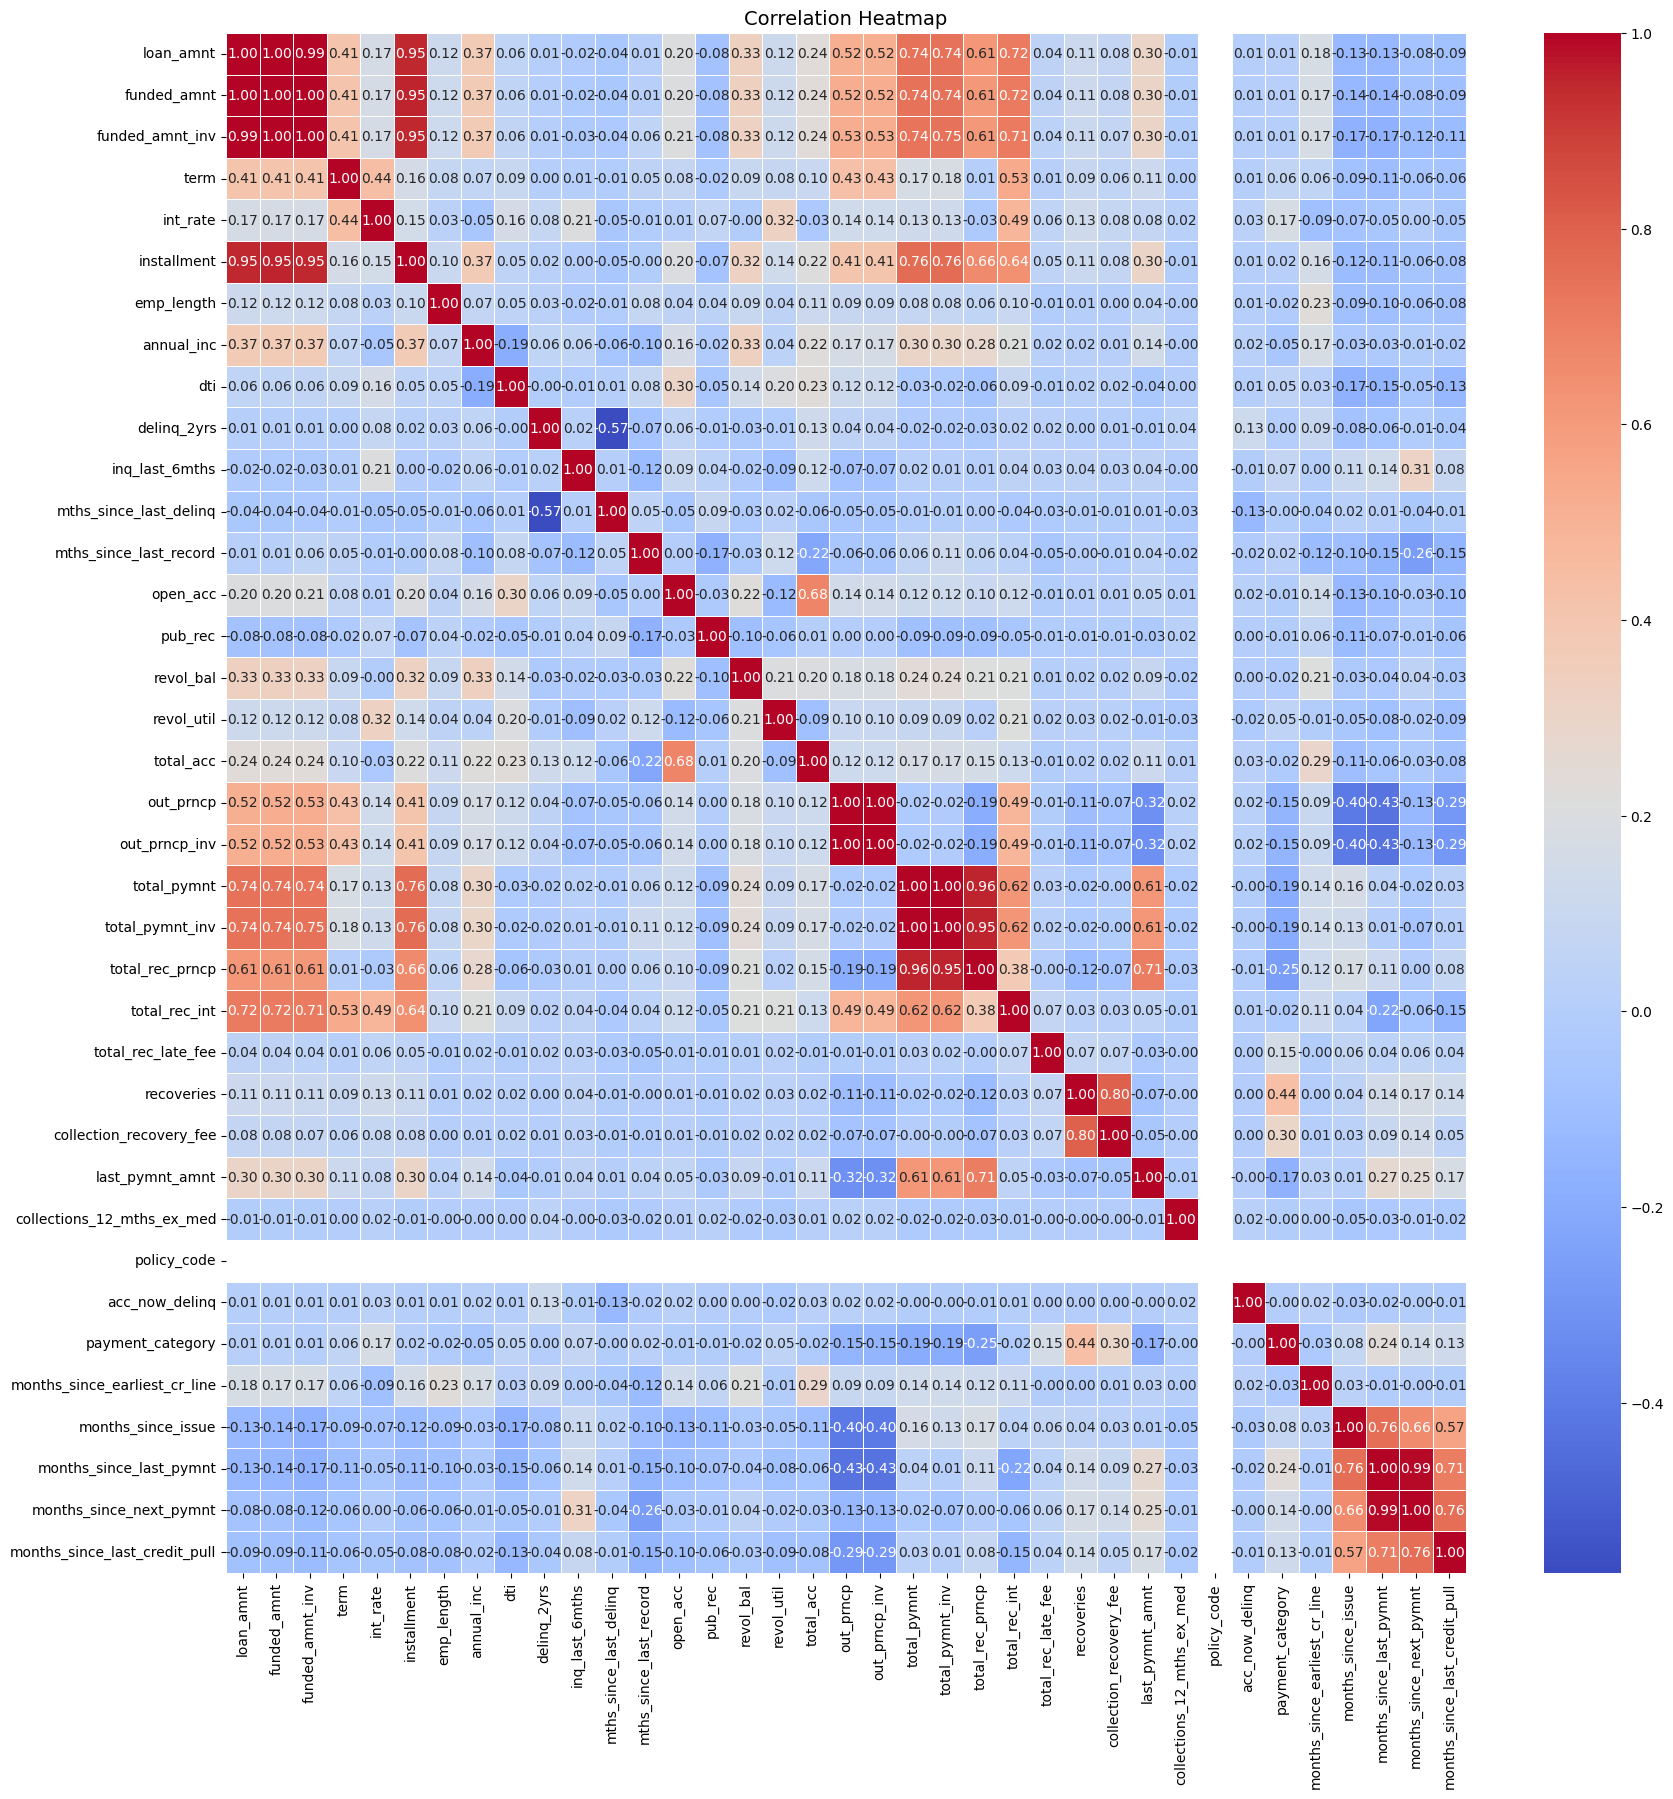

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Hitung korelasi
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tambahkan judul
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
print(df.select_dtypes(include='object').nunique())

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64


In [ ]:
df.drop(['emp_title','issue_d','title','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d'], axis=1, inplace=True)

In [ ]:
print(df.select_dtypes(exclude='object').nunique())

loan_amnt                          1352
funded_amnt                        1354
funded_amnt_inv                    9854
term                                  2
int_rate                            506
installment                       55622
emp_length                           11
annual_inc                        31901
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              145
mths_since_last_record              123
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           112
out_prncp                        135665
out_prncp_inv                    141189
total_pymnt                      351609
total_pymnt_inv                  347659
total_rec_prncp                  172713
total_rec_int                    270249
total_rec_late_fee                 5808


In [ ]:
df.drop(['policy_code'],axis=1,inplace=True)

In [ ]:
for col in df.select_dtypes(include=['object']).columns.tolist():
    print(f"Unique values in column '{col}':")
    print(df[col].value_counts(normalize=True) * 100)
    print('\n')

Unique values in column 'grade':
grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


Unique values in column 'home_ownership':
home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


Unique values in column 'verification_status':
verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


Unique values in column 'loan_status':
loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy.

In [ ]:
df.drop('pymnt_plan', axis=1, inplace=True)

In [ ]:
cat_var= df.select_dtypes(include='object').columns.tolist()
cat_var

['grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type']

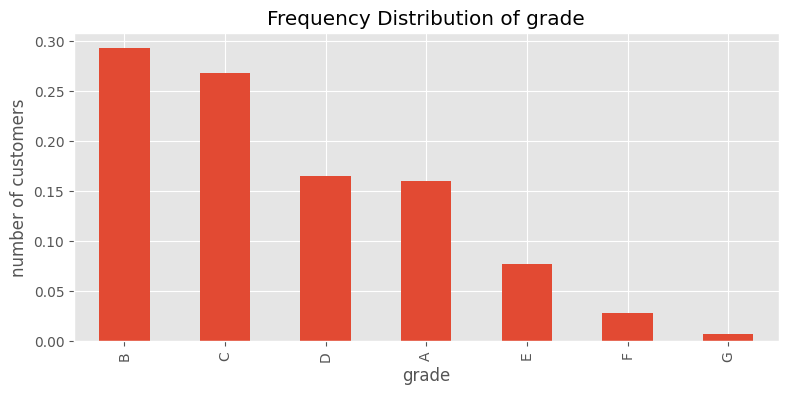

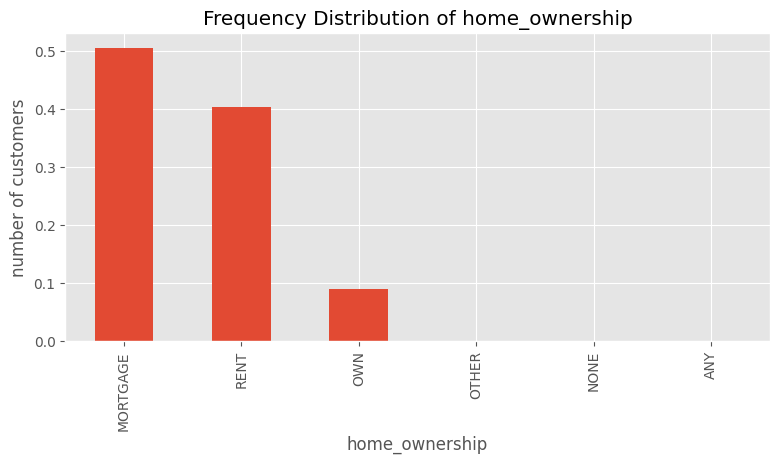

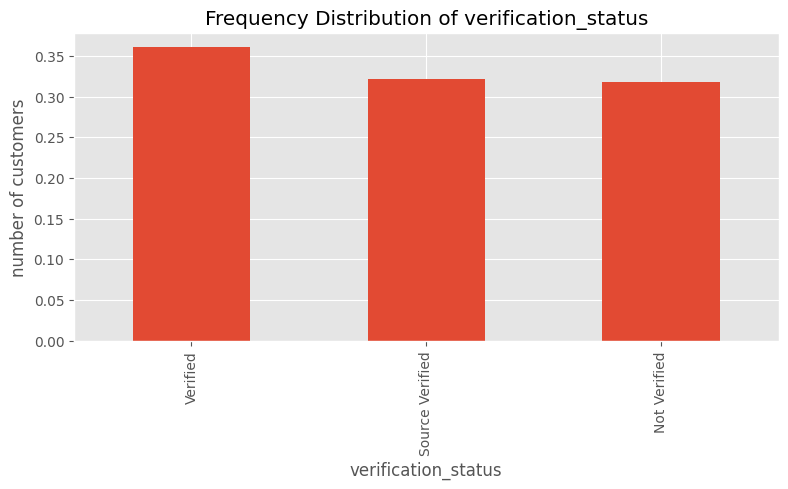

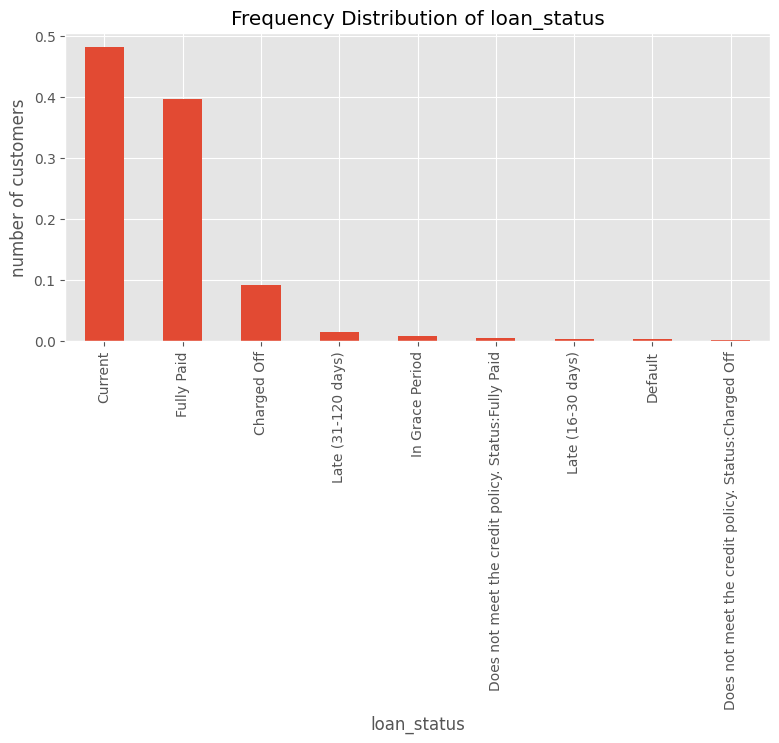

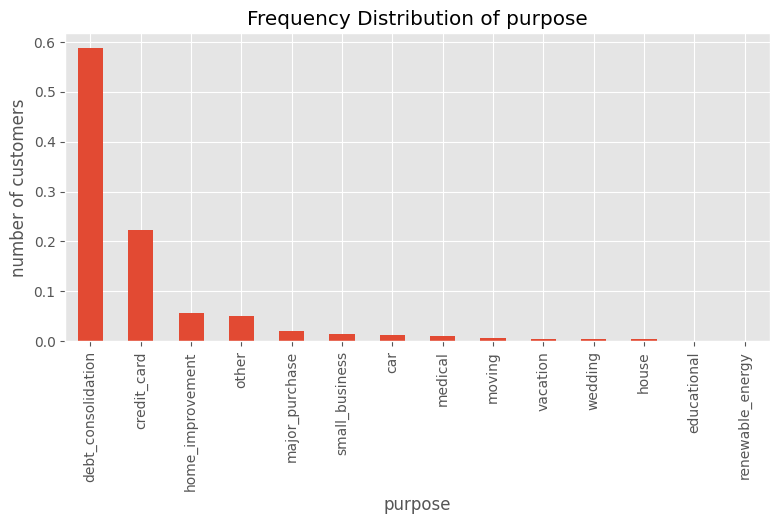

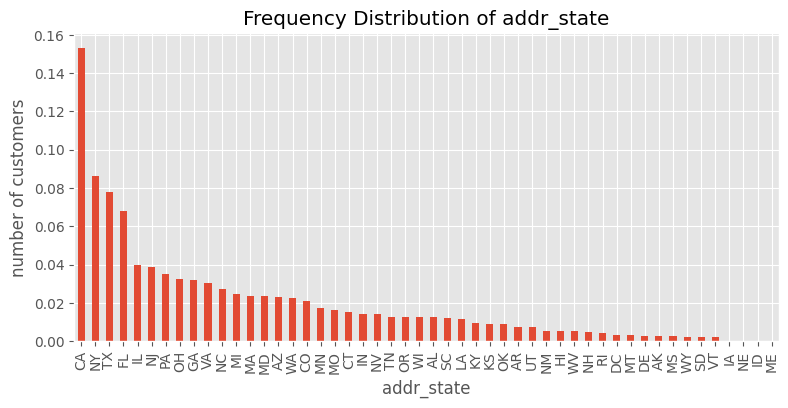

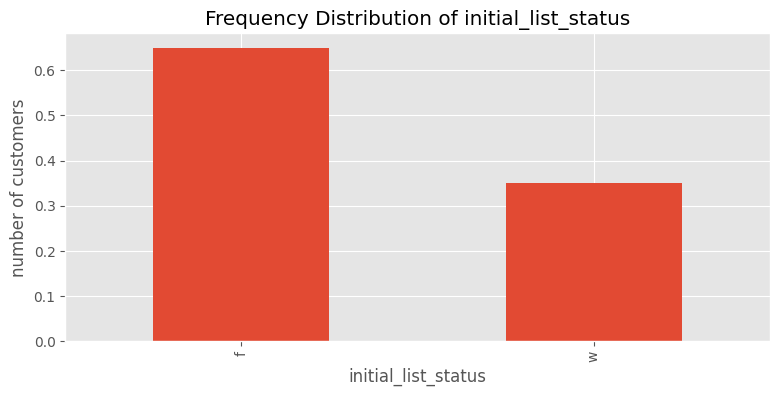

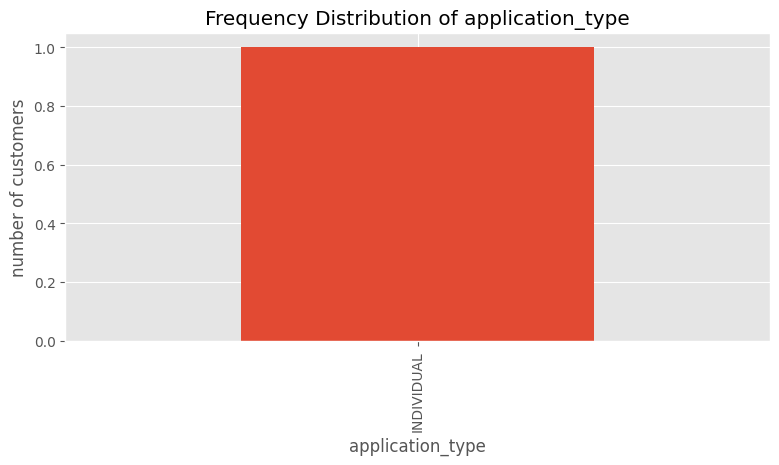

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
for column in cat_var:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  df[column].value_counts(normalize=True).plot(kind='bar')
  plt.xlabel(column)
  plt.ylabel('number of customers')
  plt.title(f'Frequency Distribution of {column}')


In [ ]:
num_var=df.select_dtypes(include=np.number)
num_var.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,payment_category,months_since_earliest_cr_line,months_since_issue,months_since_last_pymnt,months_since_next_pymnt,months_since_last_credit_pull
0,5000,5000,4975.0,36.0,10.65,162.87,10.0,24000.0,27.65,0.0,...,0.00,171.62,0.0,0.0,0,395.0,72,35.0,NaN,23.0
1,2500,2500,2500.0,60.0,15.27,59.83,0.5,30000.0,1.00,0.0,...,1.11,119.66,0.0,0.0,1,224.0,72,56.0,NaN,51.0
2,2400,2400,2400.0,36.0,15.96,84.33,10.0,12252.0,8.72,0.0,...,0.00,649.91,0.0,0.0,0,193.0,72,42.0,NaN,23.0
3,10000,10000,10000.0,36.0,13.49,339.31,10.0,49200.0,20.00,0.0,...,0.00,357.48,0.0,0.0,0,262.0,72,35.0,NaN,35.0
4,3000,3000,3000.0,60.0,12.69,67.79,1.0,80000.0,17.94,0.0,...,0.00,67.79,0.0,0.0,0,263.0,72,23.0,22.0,23.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari loan_amnt
Rata-rata  : 14317.28
Standar deviasi : 8286.51
Median : 12000.00
Mode :  10000


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari funded_amnt
Rata-rata  : 14291.80
Standar deviasi : 8274.37
Median : 12000.00
Mode :  10000


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari funded_amnt_inv
Rata-rata  : 14222.33
Standar deviasi : 8297.64
Median : 12000.00
Mode :  10000.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari term
Rata-rata  : 42.61
Standar deviasi : 10.72
Median : 36.00
Mode :  36.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari int_rate
Rata-rata  : 13.83
Standar deviasi : 4.36
Median : 13.66
Mode :  12.99


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari installment
Rata-rata  : 432.06
Standar deviasi : 243.49
Median : 379.89
Mode :  327.34


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari emp_length
Rata-rata  : 6.03
Standar deviasi : 3.56
Median : 6.00
Mode :  10.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari annual_inc
Rata-rata  : 73277.38
Standar deviasi : 54963.57
Median : 63000.00
Mode :  60000.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari dti
Rata-rata  : 17.22
Standar deviasi : 7.85
Median : 16.87
Mode :  14.4


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari delinq_2yrs
Rata-rata  : 0.28
Standar deviasi : 0.80
Median : 0.00
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari inq_last_6mths
Rata-rata  : 0.80
Standar deviasi : 1.09
Median : 0.00
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari mths_since_last_delinq
Rata-rata  : 34.10
Standar deviasi : 21.78
Median : 31.00
Mode :  9.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari mths_since_last_record
Rata-rata  : 74.31
Standar deviasi : 30.36
Median : 76.00
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari open_acc
Rata-rata  : 11.19
Standar deviasi : 4.99
Median : 10.00
Mode :  9.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari pub_rec
Rata-rata  : 0.16
Standar deviasi : 0.51
Median : 0.00
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari revol_bal
Rata-rata  : 16230.20
Standar deviasi : 20676.25
Median : 11764.00
Mode :  0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari revol_util
Rata-rata  : 56.18
Standar deviasi : 23.73
Median : 57.60
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari total_acc
Rata-rata  : 25.06
Standar deviasi : 11.60
Median : 23.00
Mode :  21.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari out_prncp
Rata-rata  : 4410.06
Standar deviasi : 6355.08
Median : 441.47
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari out_prncp_inv
Rata-rata  : 4408.45
Standar deviasi : 6353.20
Median : 441.38
Mode :  0.0


<ipython-input-51-51190d08766f>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 4))
<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari total_pymnt
Rata-rata  : 11540.69
Standar deviasi : 8265.63
Median : 9419.25
Mode :  6743.73


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari total_pymnt_inv
Rata-rata  : 11469.89
Standar deviasi : 8254.16
Median : 9355.43
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari total_rec_prncp
Rata-rata  : 8866.01
Standar deviasi : 7031.69
Median : 6817.76
Mode :  10000.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari total_rec_int
Rata-rata  : 2588.68
Standar deviasi : 2483.81
Median : 1818.88
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari total_rec_late_fee
Rata-rata  : 0.65
Standar deviasi : 5.27
Median : 0.00
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari recoveries
Rata-rata  : 85.34
Standar deviasi : 552.22
Median : 0.00
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari collection_recovery_fee
Rata-rata  : 8.96
Standar deviasi : 85.49
Median : 0.00
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari last_pymnt_amnt
Rata-rata  : 3123.91
Standar deviasi : 5554.74
Median : 545.96
Mode :  327.34


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari collections_12_mths_ex_med
Rata-rata  : 0.01
Standar deviasi : 0.11
Median : 0.00
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari acc_now_delinq
Rata-rata  : 0.00
Standar deviasi : 0.07
Median : 0.00
Mode :  0.0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari payment_category
Rata-rata  : 0.11
Standar deviasi : 0.32
Median : 0.00
Mode :  0


<ipython-input-51-51190d08766f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


Ringkasan statistik dari earliest_cr_line_date
Rata-rata  : .2f


TypeError: unsupported format string passed to Timedelta.__format__

Error in callback <function _draw_all_if_interactive at 0x7893e5576480> (for post_execute):


OverflowError: int too big to convert

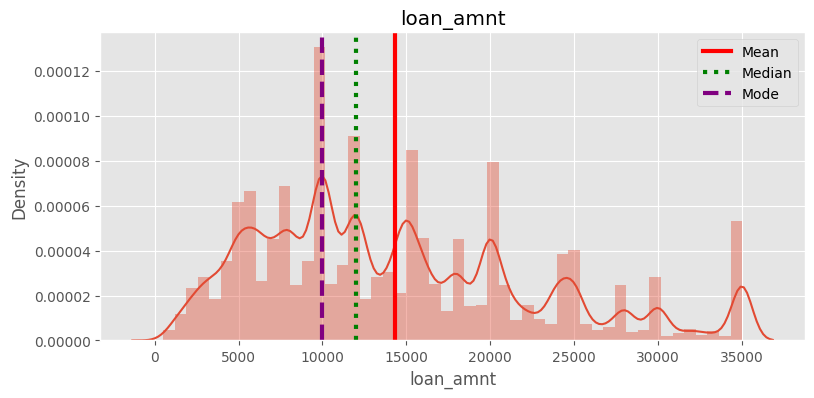

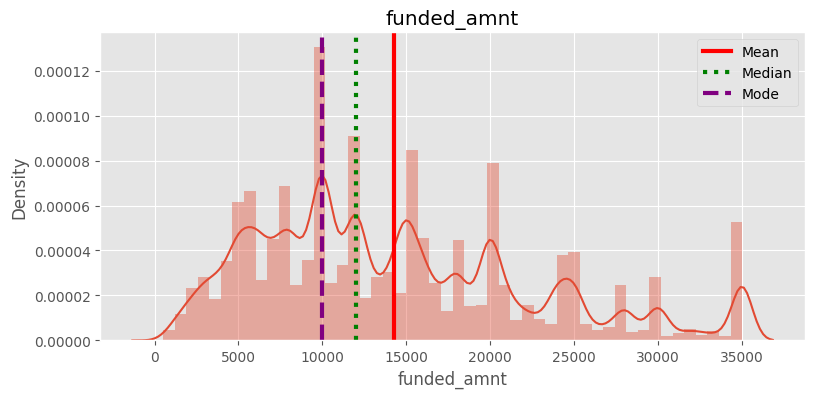

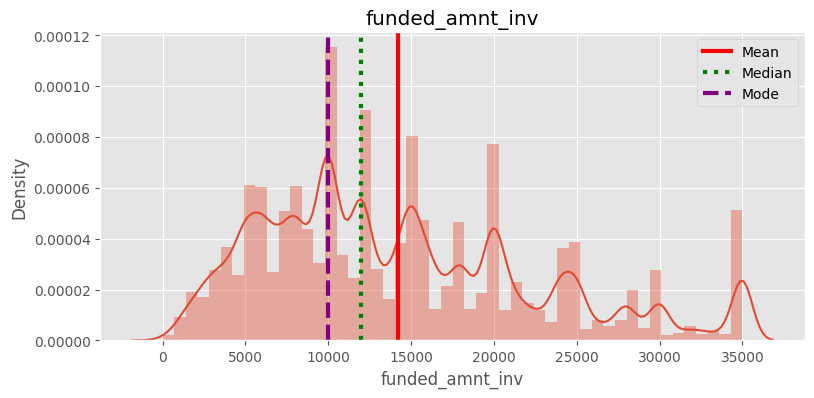

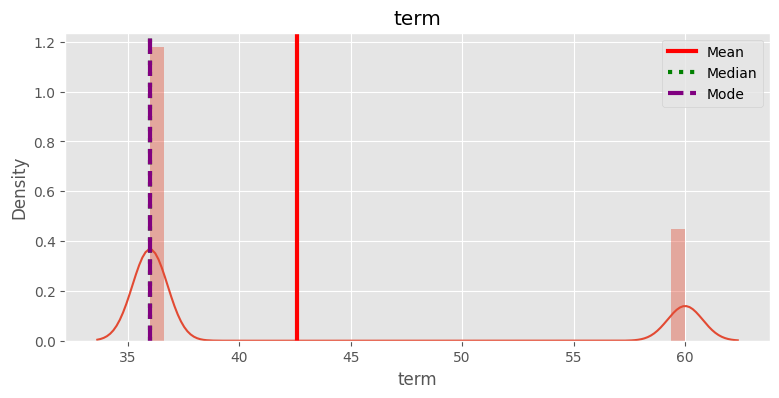

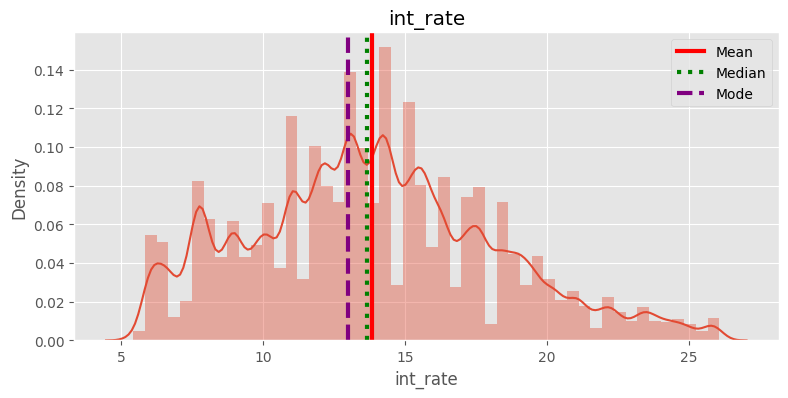

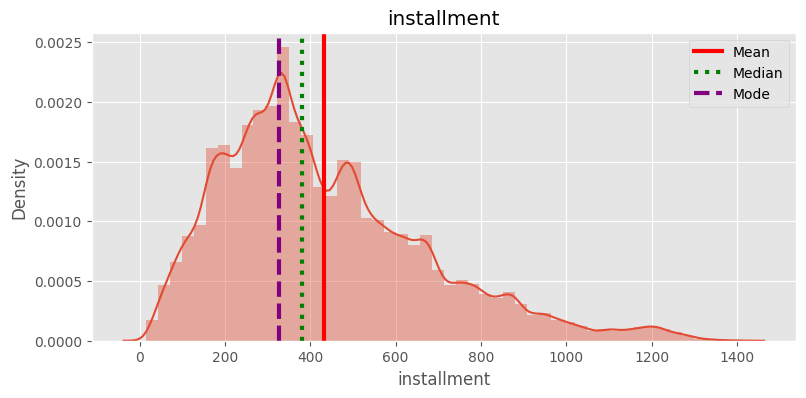

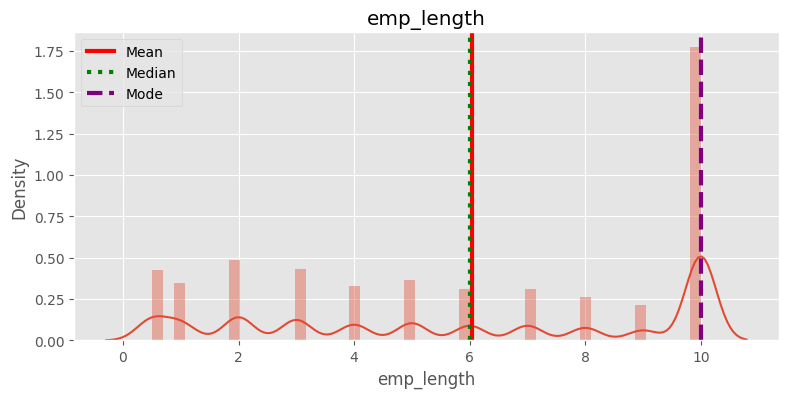

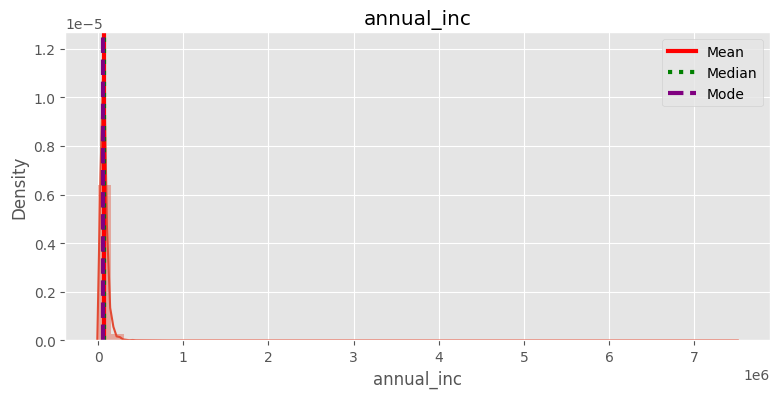

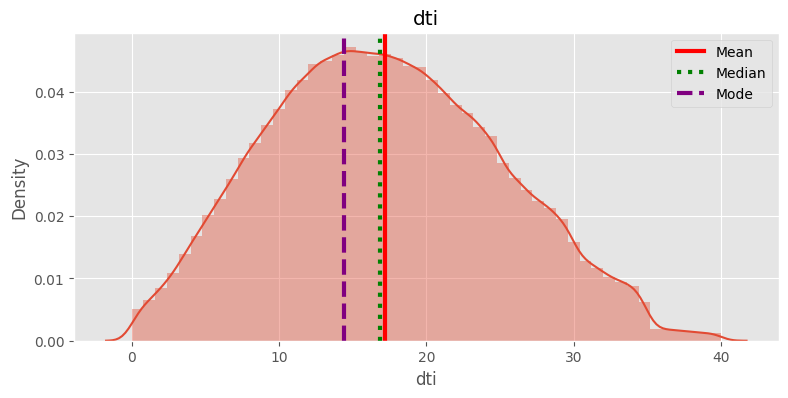

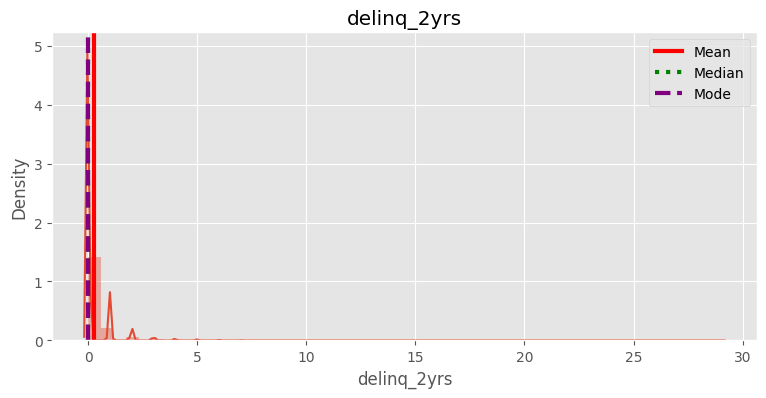

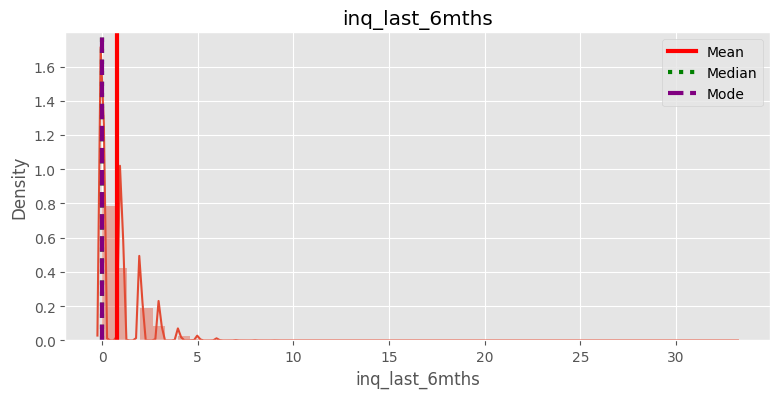

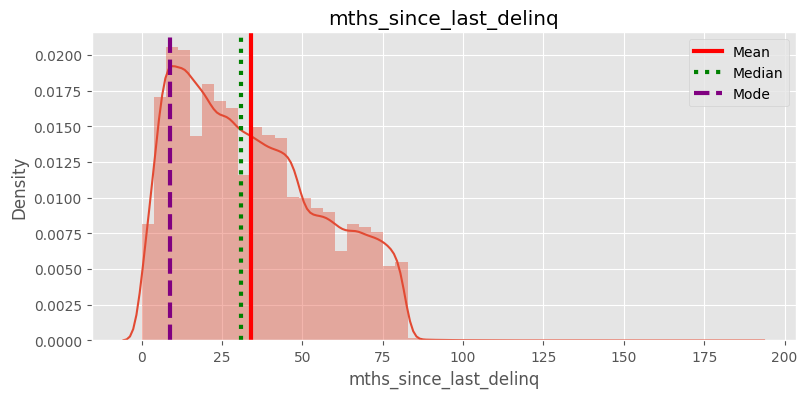

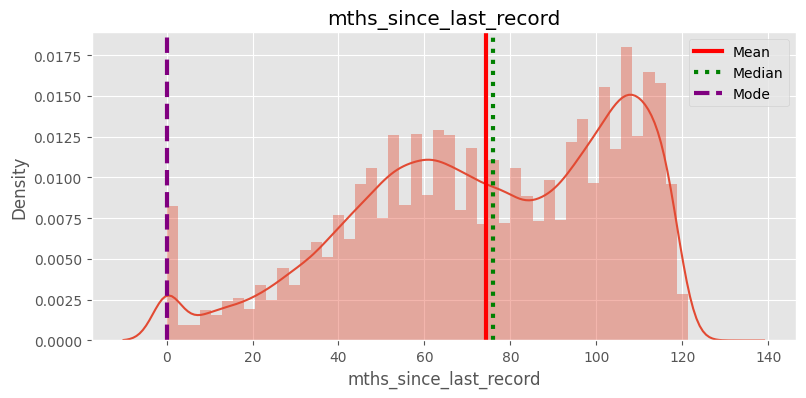

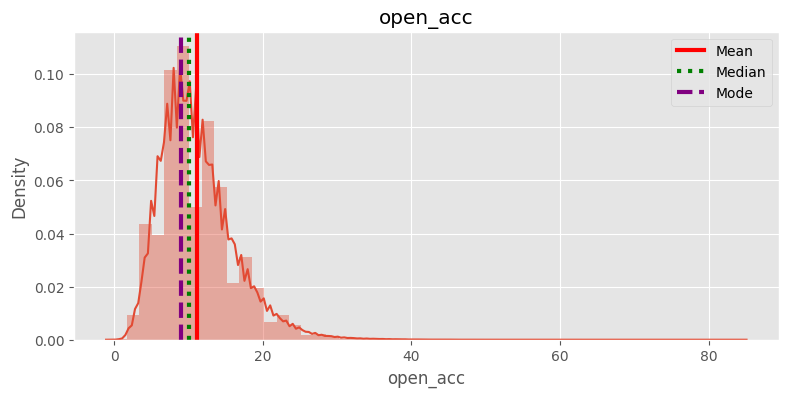

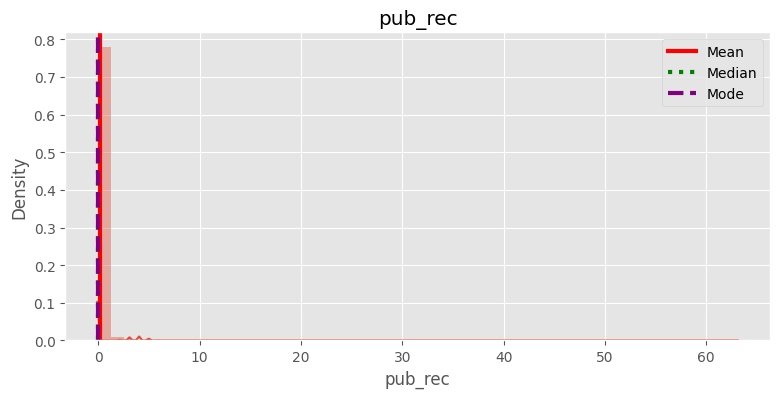

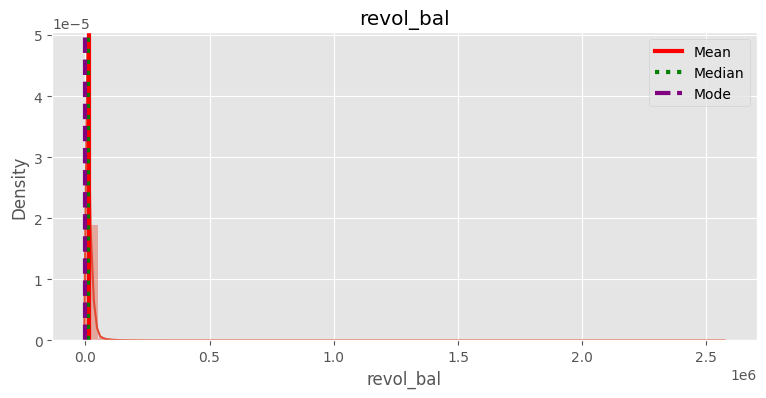

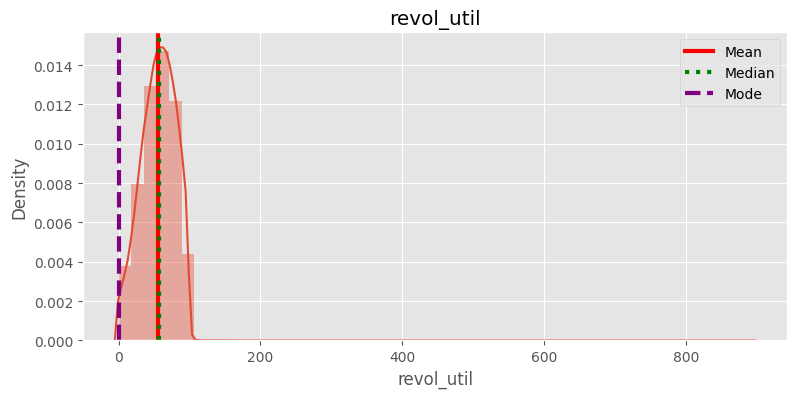

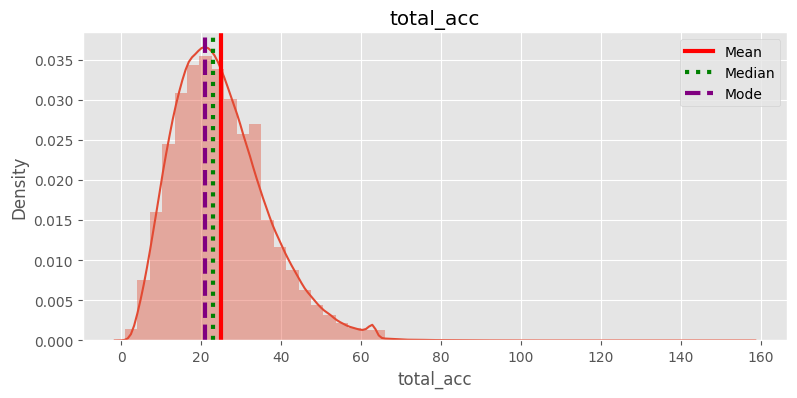

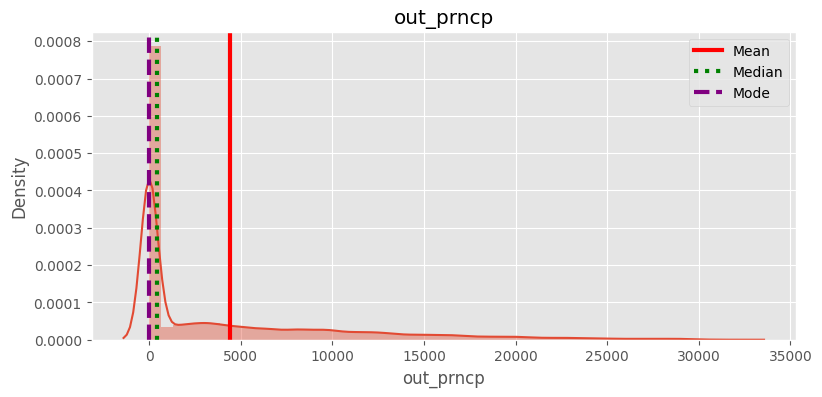

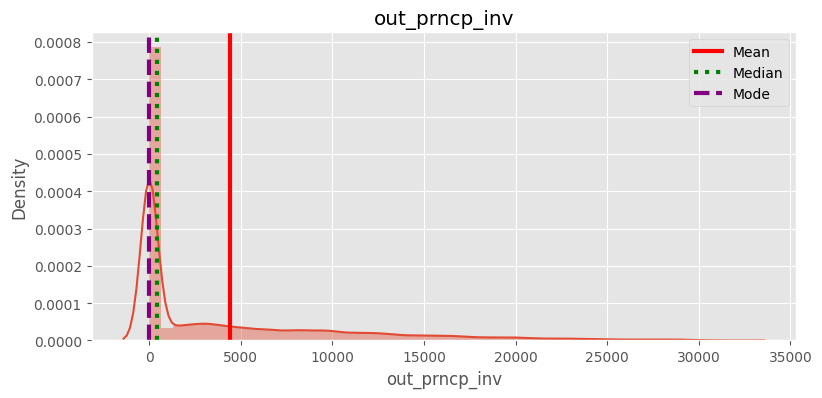

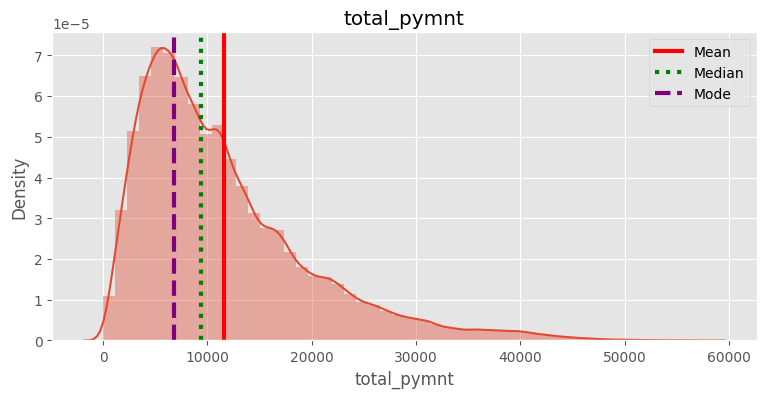

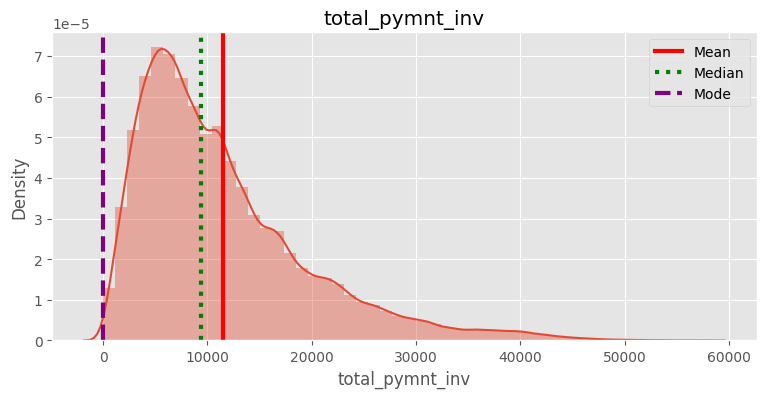

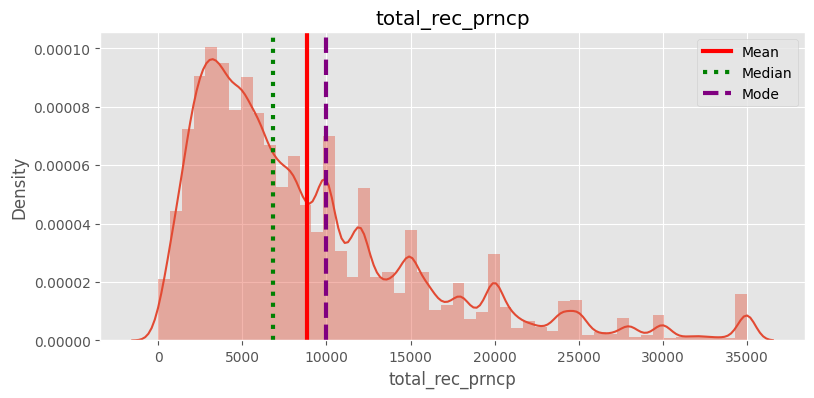

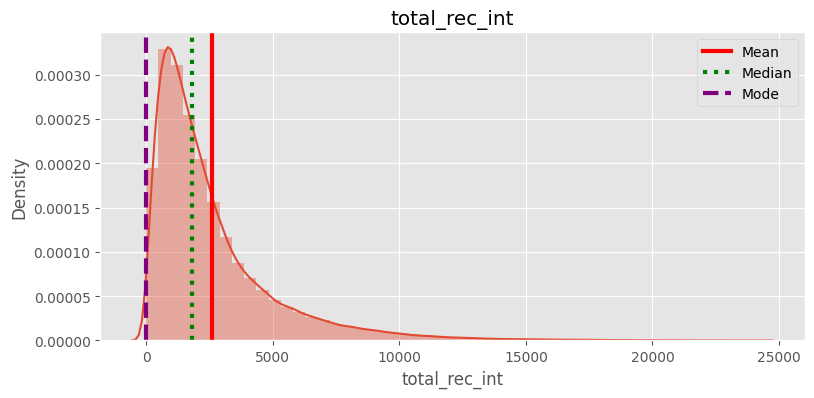

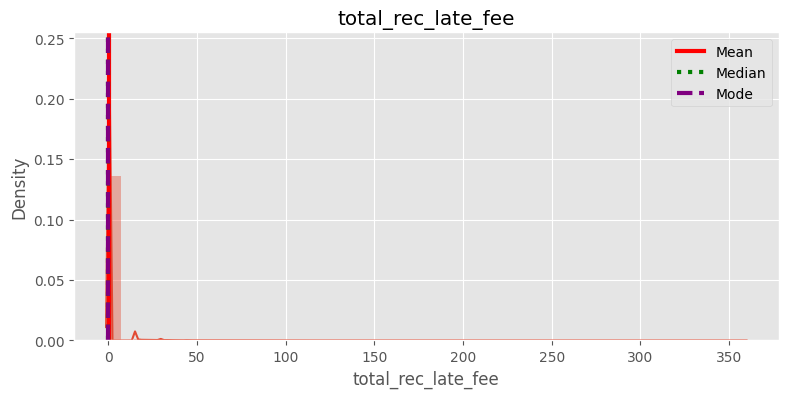

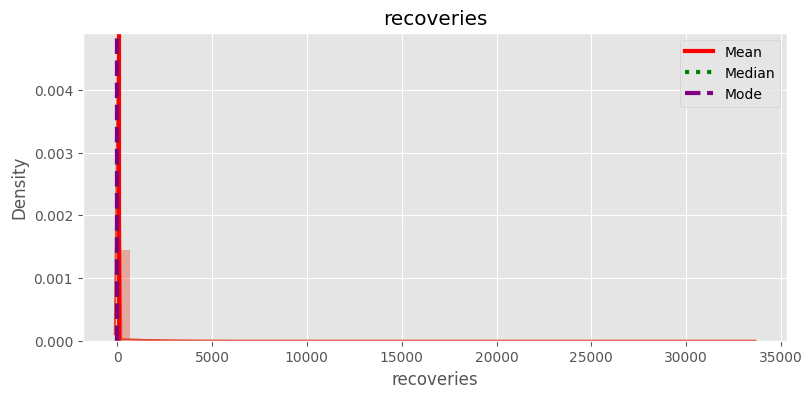

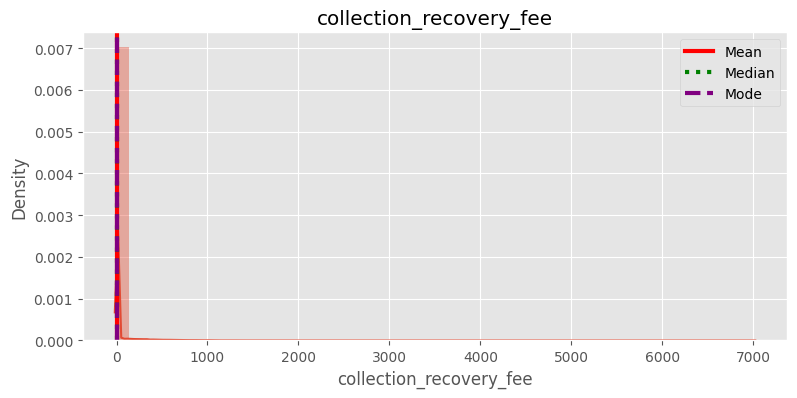

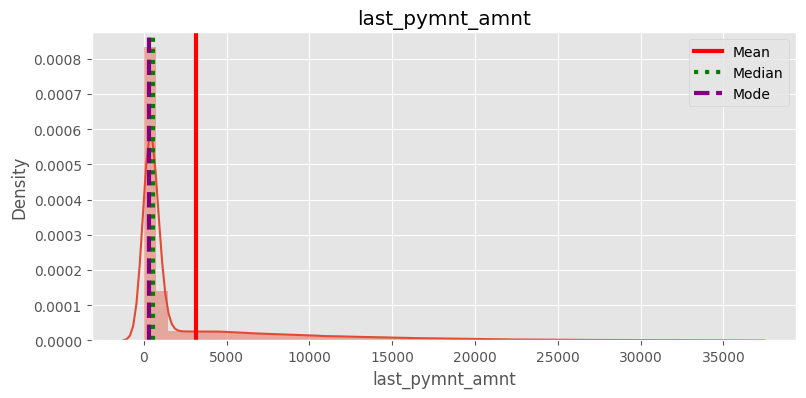

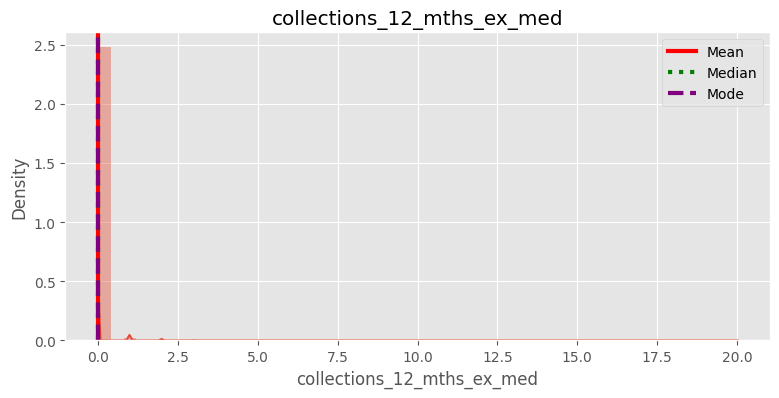

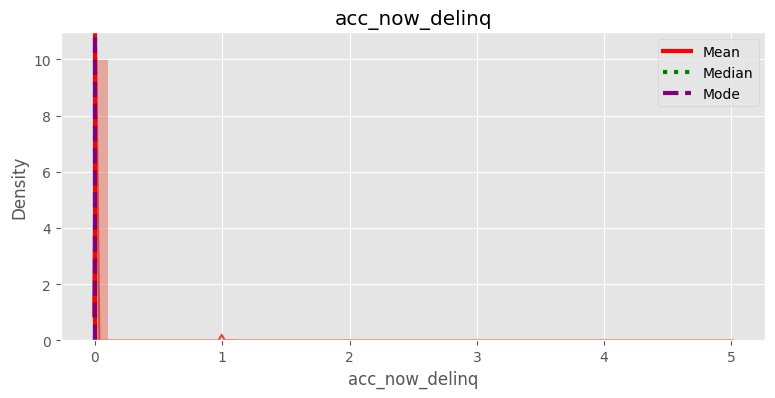

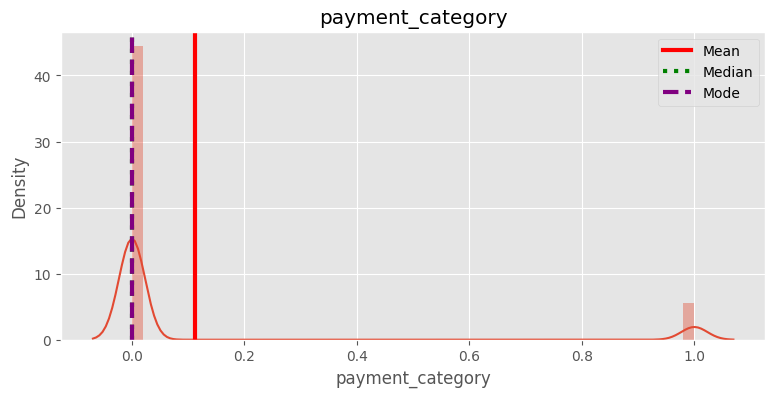

OverflowError: int too big to convert

<Figure size 2000x400 with 1 Axes>

In [ ]:
# Plotting histogram untuk setiap variabel numerik
plt.style.use("ggplot")

for column in df.select_dtypes(exclude="object").columns.tolist():
    # Menghitung statistik deskriptif
    average = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().iloc[0]  # Mengambil mode pertama (karena bisa ada lebih dari satu mode)
    std = df[column].std()

    # Membuat subplot untuk histogram
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.distplot(df[column], kde=True)

    plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
    plt.axvline(median, color='g', linestyle='dotted', linewidth=3, label='Median')
    plt.axvline(mode, color='purple', linestyle='dashed', linewidth=3, label='Mode')

    plt.legend()
    plt.title(column)

    # Menampilkan ringkasan statistik
    print("Ringkasan statistik dari {}".format(column))
    print("Rata-rata  : {:.2f}".format(average))
    print("Standar deviasi : {:.2f}".format(std))
    print("Median : {:.2f}".format(median))
    print("Mode : ", mode)


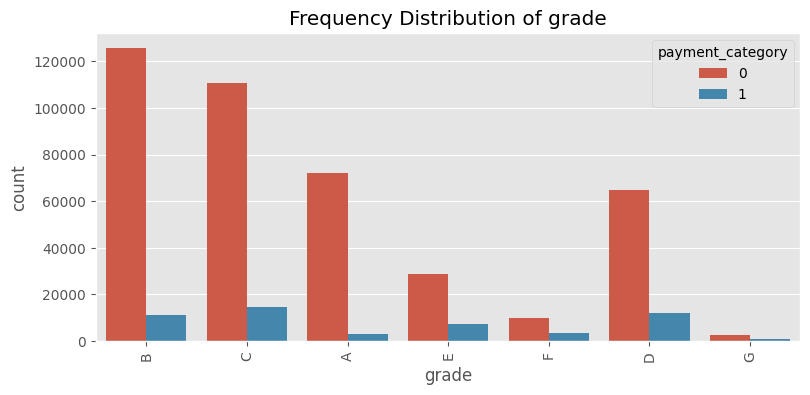

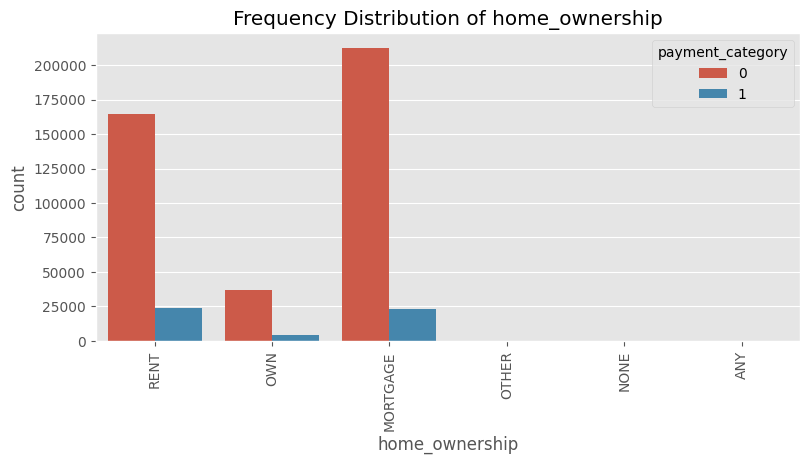

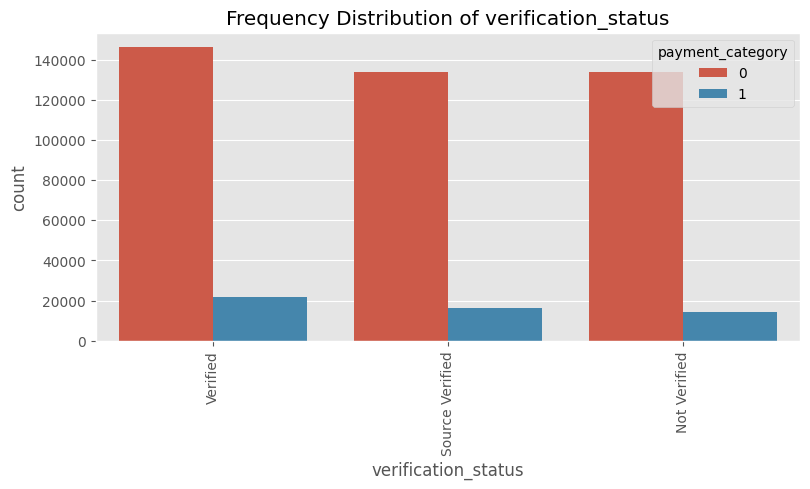

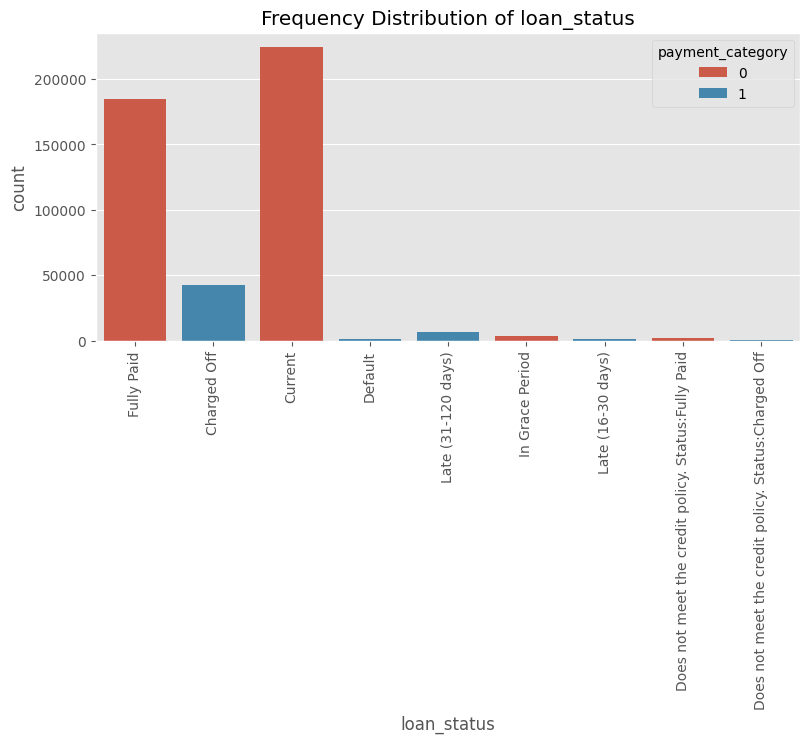

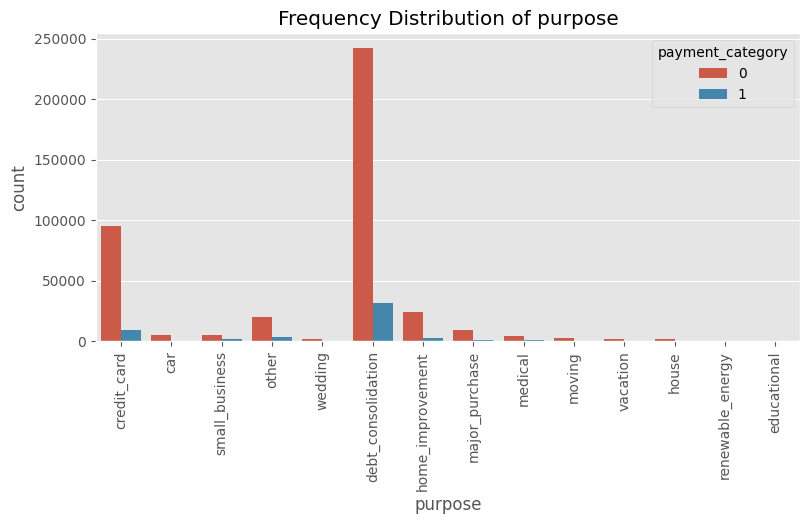

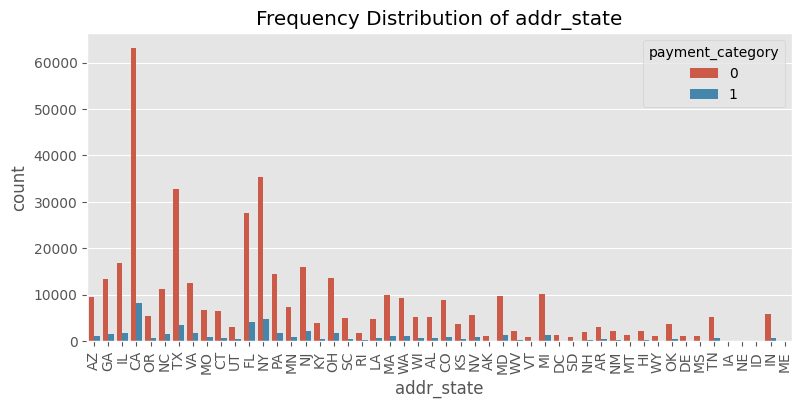

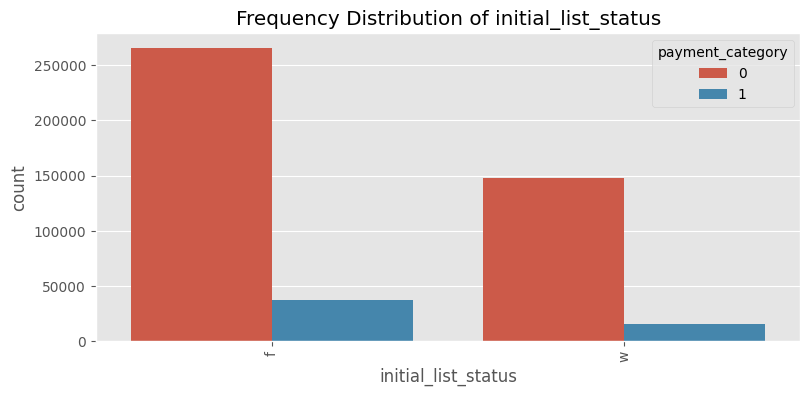

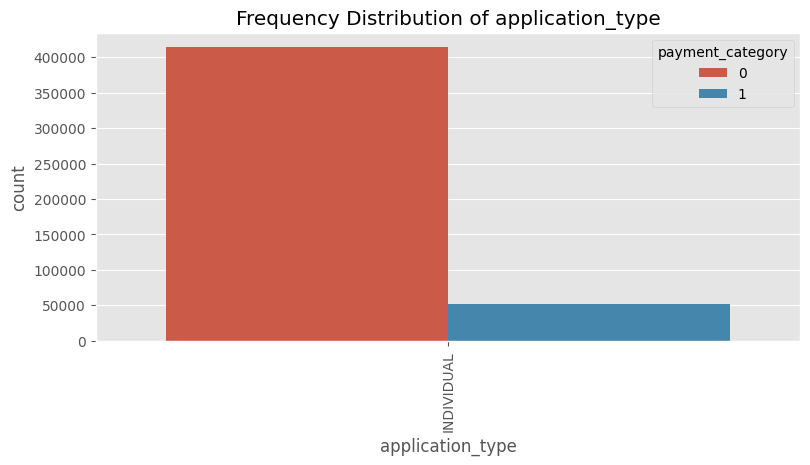

In [ ]:
plt.style.use("ggplot")
for column in cat_var:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  sns.countplot(x=df[column], hue=df["payment_category"])
  plt.title(f'Frequency Distribution of {column}')
  plt.xticks(rotation=90)

In [ ]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
missing_values = check_missing[check_missing > 0].sort_values(ascending=False)
print(missing_values)

mths_since_last_record           86.566585
mths_since_last_delinq           53.690554
months_since_next_pymnt          48.728567
next_pymnt_d_date                48.728567
emp_length                        4.505399
last_pymnt_d_date                 0.080637
months_since_last_pymnt           0.080637
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
last_credit_pull_d_date           0.009007
months_since_last_credit_pull     0.009007
delinq_2yrs                       0.006219
acc_now_delinq                    0.006219
inq_last_6mths                    0.006219
open_acc                          0.006219
pub_rec                           0.006219
earliest_cr_line_date             0.006219
total_acc                         0.006219
months_since_earliest_cr_line     0.006219
annual_inc                        0.000858
dtype: float64


In [ ]:
df.drop('mths_since_last_record', axis=1, inplace=True)

In [ ]:
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)
df['months_since_earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['emp_length'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(-1, inplace=True)


<ipython-input-55-a0452b6dcd5f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)
<ipython-input-55-a0452b6dcd5f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in cat_var:
    df[col] = label.fit_transform(df[col])

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_since_issue,last_pymnt_d_date,months_since_last_pymnt,next_pymnt_d_date,months_since_next_pymnt,last_credit_pull_d_date,months_since_last_credit_pull
0,5000,5000,4975.0,36.0,10.65,162.87,1,10.0,5,24000.0,...,1985-01-01,395.0,2011-12-01,72,2015-01-01,35.0,NaT,NaN,2016-01-01,23.0
1,2500,2500,2500.0,60.0,15.27,59.83,2,0.5,5,30000.0,...,1999-04-01,224.0,2011-12-01,72,2013-04-01,56.0,NaT,NaN,2013-09-01,51.0
2,2400,2400,2400.0,36.0,15.96,84.33,2,10.0,5,12252.0,...,2001-11-01,193.0,2011-12-01,72,2014-06-01,42.0,NaT,NaN,2016-01-01,23.0
3,10000,10000,10000.0,36.0,13.49,339.31,2,10.0,5,49200.0,...,1996-02-01,262.0,2011-12-01,72,2015-01-01,35.0,NaT,NaN,2015-01-01,35.0
4,3000,3000,3000.0,60.0,12.69,67.79,1,1.0,5,80000.0,...,1996-01-01,263.0,2011-12-01,72,2016-01-01,23.0,2016-02-01,22.0,2016-01-01,23.0


In [ ]:
from imblearn.over_sampling import SMOTE

# Menghapus kolom bertipe datetime
df_clean = df.select_dtypes(exclude=['datetime64'])

# Mengisi NaN dengan median
df_clean = df_clean.fillna(df_clean.median())

X = df_clean.drop("payment_category", axis=1)
y = df_clean["payment_category"]

# Oversampling dengan SMOTE
oversampling = SMOTE(random_state=12, sampling_strategy=1)
X_resampled, y_resampled = oversampling.fit_resample(X, y)

print("SMOTE berhasil diterapkan!")

SMOTE berhasil diterapkan!


In [ ]:
# X, y = oversampling.fit_resample(X, y)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [ ]:
y.value_counts()

,count
payment_category,
0,414099
1,52186


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(X_train.shape)
print(X_test.shape)


(373028, 42)
(93257, 42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

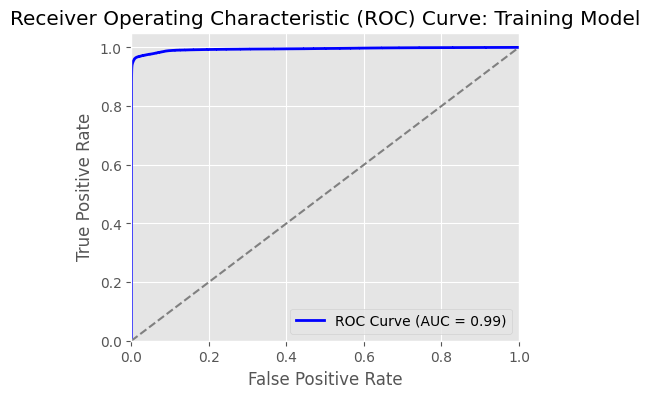

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_prob = logreg.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Training Model')
plt.legend(loc='lower right')
plt.show()
